# NBA Shot Prediction

## Section 1: Business Understanding

### Project Overview

In this project, I will attempt to build a model to predict if a basketball shot will be successful or not given the data we have behind each shot. The data to be used is NBA Shot Logs data from Kaggle([here](https://www.kaggle.com/dansbecker/nba-shot-logs)) scrapped from the NBA website. 

The analysis will attempt to cover the following questions through exploration and machine learning.

**1. What are the most important factors to consider for a shot to be successful?**

**2. Can  we use the general data provided behind each shot to predict if a shot is going to be made?**

### Approach

The notebook will consist of the following sections which will follow the approach decided to tackle the problem statements above.

Section 2: Data Preparation - The data set will be loaded and cleaned with the necessary columns formatted for the analysis

Section 3: Exploratory Analysis - An exploratory data analysis will be done to find a bit more about the necessary features

Section 4: Feature Engineering - The dataset will be cleaned and the proper features will be chosen for the modeling.

Section 5: Modelling - The following models will be used - Logistic Regression, Random Forest Classifier and XG Boost Classifier

Section 6: Conclusion and Results - The results will be visualized 



## Section 2: Data Preparation

In this section of the notebook, we will import all the libraries needed as well as the data. Additionally, we will explore and clean the data to aid us with the analysis.

### Section 2.1: Import Libraries and Data

To start, first we will need to read the necessary libraries and import the data from the CSV file

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


# import relevant functions/modules from the sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from xgboost import XGBClassifier

#Read the data from the CSV file
shots = pd.read_csv(r'C:\Users\b_iva\Desktop\Udacity\DSND Capstone Project\NBA Shot Logs.csv') #The data that will be manipulated

shots.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


### Section 2.2: General Overview
 

First I will look at a top-level summary of the dataset and describe the columns.

In [3]:
print('Shape: {}'.format(shots.shape)) #Print the length of the data
print('')
print('Columns: {}'.format(shots.columns)) #Print all columns
print('')
print('Columns Types: {}'.format(shots.dtypes)) #Print all columns data types
print('')
print('Columns with missing values:') #Print General Information
print(shots.describe())
print('Columns with missing values:')
print(shots.isnull().sum()[shots.isnull().sum()>0]/shots.shape[0]) #Print the percentage of missing values for the columns

Shape: (128069, 21)

Columns: Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id'],
      dtype='object')

Columns Types: GAME_ID                         int64
MATCHUP                        object
LOCATION                       object
W                              object
FINAL_MARGIN                    int64
SHOT_NUMBER                     int64
PERIOD                          int64
GAME_CLOCK                     object
SHOT_CLOCK                    float64
DRIBBLES                        int64
TOUCH_TIME                    float64
SHOT_DIST                     float64
PTS_TYPE                        int64
SHOT_RESULT                    object
CLOSEST_DEFENDER               object
CLOSEST_DEFENDER_PLAYER_ID      int64
CLOS

The data set looks very clean in terms of missing values, with only the Shot Clock column having 4% of its values missing. Given that this number is very small it is considered to be immaterial so for the purposes of the analysis those missing columns will be excluded.

Below is a description of the individual columns:
- GAME_ID: The unique identifier for a game in the dataset.
- MATCHUP: The specific matchup that has been considered, including Date and Teams.
- LOCATION: A flag to indicate whether it is a Home(H) or Away(A) game.
- W: A flag to indicate whether the game is a Win(W) or Loss(L) for the player that made the shot.
- FINAL_MARGIN: The point differential between the winning and losing team. Positive if a win and negative if a loss.
- SHOT_NUMBER: The number of the shot attempted.
- PERIOD: Which quarter the shot was attempted.
- GAME_CLOCK: How much time is left from the quarter.
- SHOT_CLOCK: How much time is left from the play. Each team has 24 seconds to attempt and attack.
- DRIBBLES: Number of dribbles.
- TOUCH_TIME: The amount of time the ball has been in the player's hands. **Note: There are negatives in the data which need to be excluded**
- SHOT_DIST: Distance from the basket.
- PTS_TYPE: Whether the shot attempted is a 2 or 3 pointer.
- SHOT_RESULT: A flag to indicate if the shot is Missed(missed) or Made(made)
- CLOSEST_DEFENDER: Name of the closest defender
- CLOSEST_DEFENDER_PLAYER_ID: Id of the closest defender
- CLOSE_DEF_DIS: Distance of the closest defender
- FGM: Field Goals Made statistic
- PTS: Points made.
- PLAYER_NAME: Name of the player attempting the shot
- PLAYER_ID: Unique ID of the player attempting the shot

### Section 2.2: Data Clean

To be able to perform the analysis we will need to go through the following steps first:
1. Drop the missing values from SHOT_CLOCK
2. Remove the rows with negative Touch Time as this cannot be negative
3. Create a new column that will convert the GAME_CLOCK field to seconds7
4. Format the shot clock as int

In [4]:
#Drop the missing values
shots_cleaned = shots.dropna()

In [5]:
#Remove rows with negative touch time
shots_cleaned = shots_cleaned[shots_cleaned['TOUCH_TIME'] > 0]

In [6]:
#A function to convert the datetime.time value to seconds
def convert_to_seconds(value):
    
    ''' 
    A function that will convert datetime.time field to seconds.
    
    INPUT
    value: datetime.time format
    
    OUTPUT
    seconds: the total seconds
    '''
        
    seconds = (value.hour * 60 + value.minute) * 60 + value.second

    return seconds

#Convert datetime.time format
shots_cleaned['GAME_CLOCK_NEW'] =  pd.to_datetime(shots_cleaned['GAME_CLOCK'], format='%M:%S').dt.time 

#Convert to seconds
shots_cleaned['GAME_CLOCK_SECONDS'] = shots_cleaned.GAME_CLOCK_NEW.apply(convert_to_seconds)

In [7]:
#Format shot clock as int
shots_cleaned['SHOT_CLOCK'].astype(int)

0         10
1          3
3         10
4         10
5          9
          ..
128063    15
128064    18
128065    19
128066    23
128067     9
Name: SHOT_CLOCK, Length: 119386, dtype: int32

## Section 3: Exploratory Analysis

In this section of the notebook, we will do an exploratory analysis to understand a bit more about our data.  Given that the goal is to predict if a shot is to be made the analysis will mainly cover the relationship between shots made/missed and the other variables.

### `1.` Correlation between variables
First, lets look at the correlation between the variables. For the purpose of calculating correlation, I will use pandas cat.codes accessor to encode the categorical variables. All of the columns to be encoded will have a label of 1 or 0.

In [8]:
#Create a list of all columns in need of encoding
categorize_column = ['LOCATION', 'W','SHOT_RESULT']

#Get a new dataframe with the encoded columns
shots_encoded = shots_cleaned.copy()

#Label encode all categorical columns
for x in categorize_column:
    shots_encoded[x] = shots_encoded[x].astype('category')
    shots_encoded[x] = shots_encoded[x].cat.codes

Create a correlation heatmap

In [9]:
#Drop the unnecessary columns
shots_encoded = shots_encoded.drop(['GAME_ID','MATCHUP','CLOSEST_DEFENDER','player_name','GAME_CLOCK_NEW','GAME_CLOCK'],axis=1)

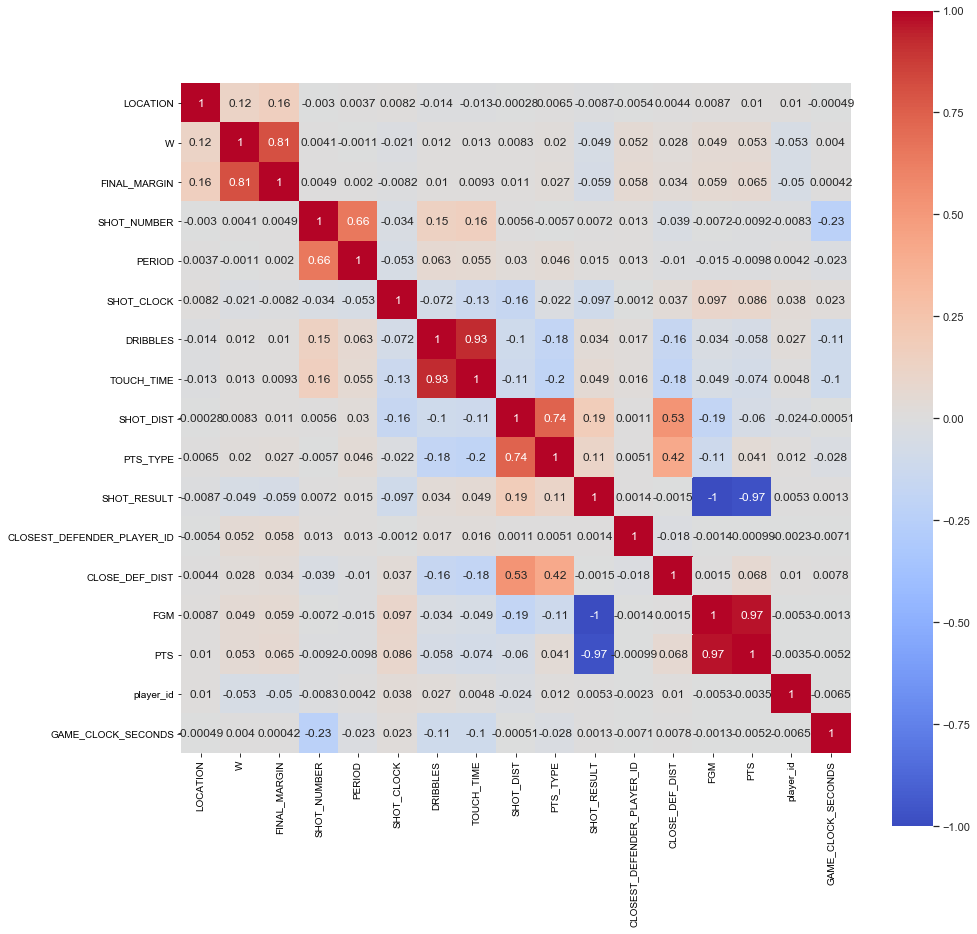

In [10]:
#Compute correlation
corrs = np.corrcoef(shots_encoded.values.T)

#Create correlation heatmap
fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale=1)
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, cmap='coolwarm',
              yticklabels = shots_encoded.columns, xticklabels = shots_encoded.columns)

The correlation matrix above shows overall the following trends:

- There is a perfect correlation between SHOT_RESULT and FGM and PTS. That is because FGM indicates if the field goal is made which is the same as SHOT_RESULT and PTS shows the points if the shots are made and 0 if missed. For the purposes of the analysis and modeling, those columns will be dropped.
- We see a moderate to low correlation between SHOT_RESULT and SHOT_DIST, suggesting that the higher the distance the harder is to make a shot
- We see a moderate to low correlation between SHOT_RESULT and PTS_TYPE, suggesting that 3 point shots might be harder than 2 point
- We see a moderate to low correlation between SHOT_NUMBER and DRIBBLES and TOUCH_TIME.

### `2.` Overall Shots Made/Missed Breakdown

In [11]:
shots_analysis = shots_cleaned.copy()

Percentage of made and missed shots:
SHOT_RESULT
made      45.6
missed    54.4
Name: GAME_ID, dtype: float64


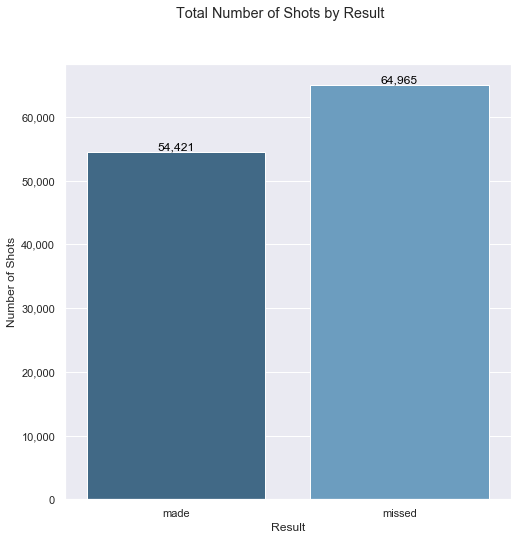

In [12]:
#Plot all shots by result
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(shots_analysis.SHOT_RESULT,palette='Blues_d')

# Iterate through the list of axes' patches to add the Data Labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), format(int(p.get_height()),','), 
            fontsize=12, color='black', ha='center', va='bottom')

#Format the y axis
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Add the plot heading and axis labels
plt.suptitle("Total Number of Shots by Result"); 
plt.xlabel('Result');
plt.ylabel('Number of Shots');

#Calculate Percentage of Shots per each type 
shots_bytype = shots_analysis.groupby(['SHOT_RESULT'])['GAME_ID'].count()
shots_table = round(shots_bytype/shots_bytype.sum()*100,1)

#Print the table
print('Percentage of made and missed shots:')
print(shots_table)

As we can see the dataset is a bit imbalanced with 10,544 shots missed than made.

### `3.`  Breakdown by Type of Shots - 2 or 3 pointer

Percentage of made and missed shots:
PTS_TYPE  SHOT_RESULT
2         made           48.9
          missed         51.1
3         made           36.2
          missed         63.8
Name: GAME_ID, dtype: float64


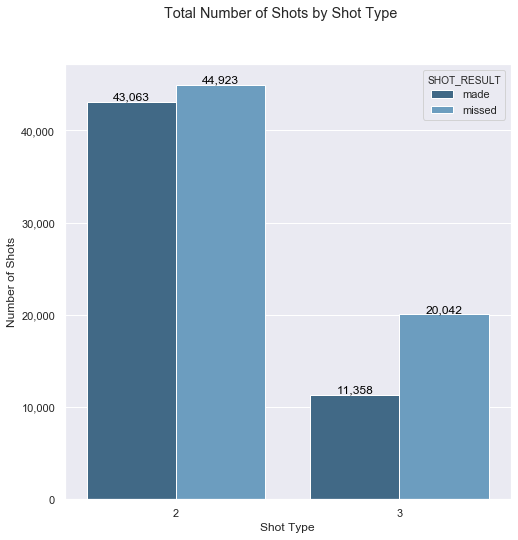

In [13]:
#Plot all shots by type of shot type and result
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x='PTS_TYPE', hue='SHOT_RESULT', data = shots_analysis, palette='Blues_d')

# Iterate through the list of axes' patches to add the Data Labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), format(int(p.get_height()),','), 
            fontsize=12, color='black', ha='center', va='bottom')
    
#Format the y axis
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Add the plot headings and axis labels
plt.suptitle("Total Number of Shots by Shot Type"); 
plt.xlabel('Shot Type');
plt.ylabel('Number of Shots');

#Calculate Percentage of Shots per each type 
shots_bytype = shots_analysis.groupby(['PTS_TYPE','SHOT_RESULT'])['GAME_ID'].count()
shots_table = round(shots_bytype/shots_bytype.groupby(level=0).sum()*100,1)

#Print the table
print('Percentage of made and missed shots:')
print(shots_table)

As, probably, we can expect the difference between made and missed 3 point shots is much larger than the 2 points. 3 point shots are generally much harder and from a longer distance.

### `4.`  Breakdown by Location - Home/Away

Percentage of made and missed shots:
LOCATION  SHOT_RESULT
A         made           45.1
          missed         54.9
H         made           46.0
          missed         54.0
Name: GAME_ID, dtype: float64


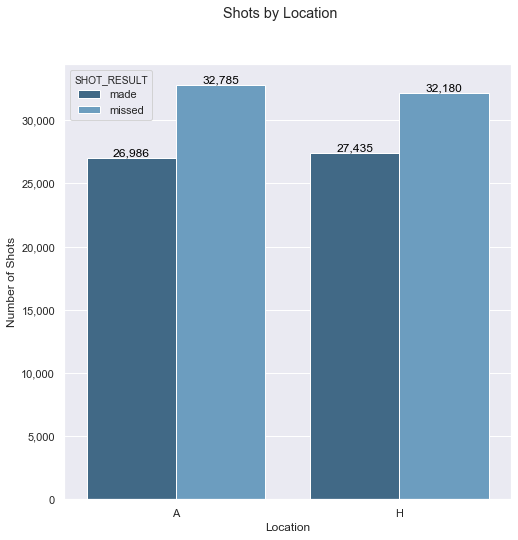

In [14]:
#Plot all shots by location and result
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x='LOCATION', hue='SHOT_RESULT', data = shots_analysis, palette='Blues_d')

# Iterate through the list of axes' patches to add the Data Labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), format(int(p.get_height()),','), 
            fontsize=12, color='black', ha='center', va='bottom')
    
#Format the y axis
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Add the plot headings and axis labels
plt.suptitle("Shots by Location"); 
plt.xlabel('Location');
plt.ylabel('Number of Shots');

#Calculate Percentage of Shots per each location
shots_bytype = shots_analysis.groupby(['LOCATION','SHOT_RESULT'])['GAME_ID'].count()
shots_table = round(shots_bytype/shots_bytype.groupby(level=0).sum()*100,1)

#Print the table
print('Percentage of made and missed shots:')
print(shots_table)

Location doesn't seem to be affecting the shot results, with very similar numbers for Home and Away.

### `5.`  Breakdown by Match Outcome

In [15]:
# Check if the number of games is even
print(shots_analysis.groupby(['W'])['GAME_ID'].agg("nunique"))

#Check the number of shots made per each outcome
print(shots_analysis.groupby(['W'])['GAME_ID'].count())

W
L    896
W    896
Name: GAME_ID, dtype: int64
W
L    58778
W    60608
Name: GAME_ID, dtype: int64


Percentage of made and missed shots:
W  SHOT_RESULT
L  made           43.1
   missed         56.9
W  made           48.0
   missed         52.0
Name: GAME_ID, dtype: float64


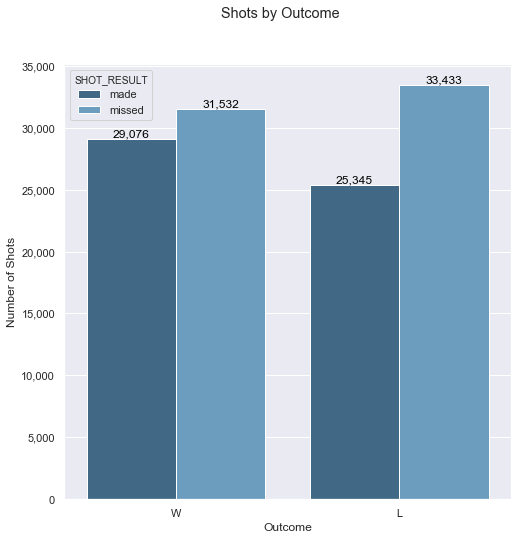

In [16]:
#Plot all shots by match outcome and result
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(x='W', hue='SHOT_RESULT', data = shots_analysis, palette='Blues_d')

# Iterate through the list of axes' patches to add the Data Labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), format(int(p.get_height()),','), 
            fontsize=12, color='black', ha='center', va='bottom')
    
#Format the y axis
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Add the plot headings and axis labels
plt.suptitle("Shots by Outcome"); 
plt.xlabel('Outcome');
plt.ylabel('Number of Shots');

#Calculate Percentage of Shots per each outcome
shots_bytype = shots_analysis.groupby(['W','SHOT_RESULT'])['GAME_ID'].count()
shots_table = round(shots_bytype/shots_bytype.groupby(level=0).sum()*100,1)

#Print the table
print('Percentage of made and missed shots:')
print(shots_table)

There is roughly 50/50 split between total shots made by winning and losing teams. 

We see a larger percentage of missed shots by players in losing teams compared to teams that have won.

However, it is to be noted that is the outcome of the game is known only at the end, hence using this in the model might skew the results. At the time of the shot, the outcome is unknown and a better variable to use will be the current situation of the game at the time of the shot. Unfortunately, this data is not available.

### `6.`  Breakdown by Final Margin

Percentage of made and missed shots:
MARGIN_BAND  SHOT_RESULT
-10 to -20   made           42.5
             missed         57.5
-20+         made           39.6
             missed         60.4
0 to -10     made           44.1
             missed         55.9
0 to 10      made           46.7
             missed         53.3
10 to 20     made           48.7
             missed         51.3
20+          made           51.3
             missed         48.7
Name: GAME_ID, dtype: float64


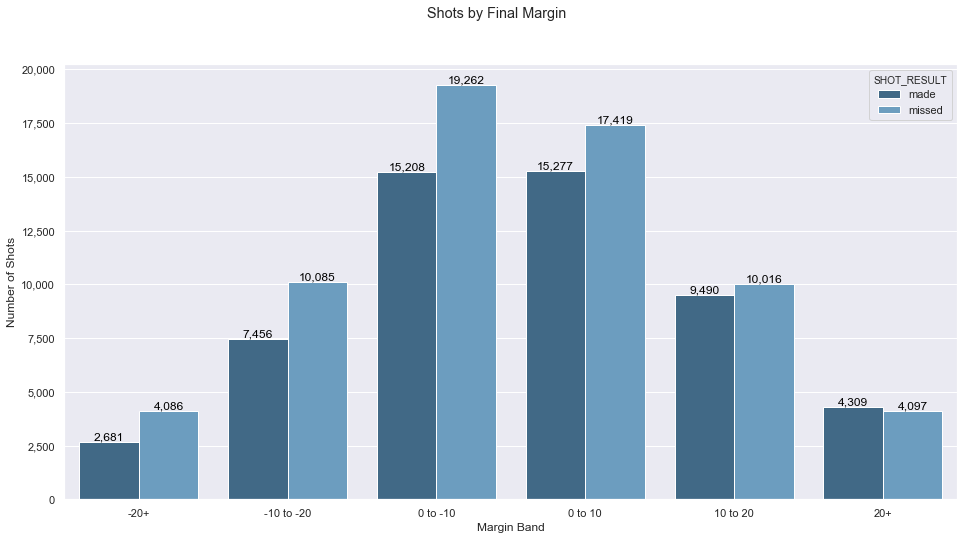

In [17]:
#A function to bundle the final margins into 6 different bands for an easier visualisation
def add_marginband(value):
    
    ''' 
    A function that will bundle each shot in a margin band dependant on the final margin column.
    
    INPUT
    value: final margin
    
    OUTPUT
    band: margin band
    '''
        
    band = None
    if  value<-20:
        band = '-20+'
    elif value<-10:
        band = '-10 to -20'
    elif value<0:
        band = '0 to -10'
    elif value<10:
        band = '0 to 10'
    elif value<20:
        band = '10 to 20'
    else:
        band = '20+'

    return band

#Create the new column with the bands
shots_analysis["MARGIN_BAND"] = shots_analysis.FINAL_MARGIN.apply(add_marginband)

#Plot all shots by final margin result
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='MARGIN_BAND', hue='SHOT_RESULT', data = shots_analysis, order=['-20+','-10 to -20','0 to -10','0 to 10'
                                                   ,'10 to 20','20+']
              ,palette='Blues_d')

# Iterate through the list of axes' patches to add the Data Labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), format(int(p.get_height()),','), 
            fontsize=12, color='black', ha='center', va='bottom')
    
#Format the y axis
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Add the plot headings and axis labels
plt.suptitle("Shots by Final Margin"); 
plt.xlabel('Margin Band');
plt.ylabel('Number of Shots');

#Calculate Percentage of Shots per each margin band 
shots_bytype = shots_analysis.groupby(['MARGIN_BAND','SHOT_RESULT'])['GAME_ID'].count()
shots_table = round(shots_bytype/shots_bytype.groupby(level=0).sum()*100,1)

#Print the table
print('Percentage of made and missed shots:')
print(shots_table)

The largest difference is seen by losses with 20+ points, while we see that more shots have been made than missed in wins with 20+ points. In general, the numbers are much closer in wins than losses. All of this makes sense in general given that winning teams will tend to shoot more efficiently(this is not always going to be the case!).

AS mentioned for the outcome, the margin here is the final margin hence it might not be representative of the situation when the shot was made. A better variable will be the margin at the time of the shots, however, this data is not available.

### `7.`  Breakdown by Shot Number #####

Percentage of made and missed shots:
SHOT_NUMBER_BAND  SHOT_RESULT
0-5               made           45.8
                  missed         54.2
11-15             made           45.2
                  missed         54.8
16-20             made           43.9
                  missed         56.1
21-25             made           42.7
                  missed         57.3
26-30             made           42.9
                  missed         57.1
31+               made           51.1
                  missed         48.9
6-10              made           45.6
                  missed         54.4
Name: GAME_ID, dtype: float64


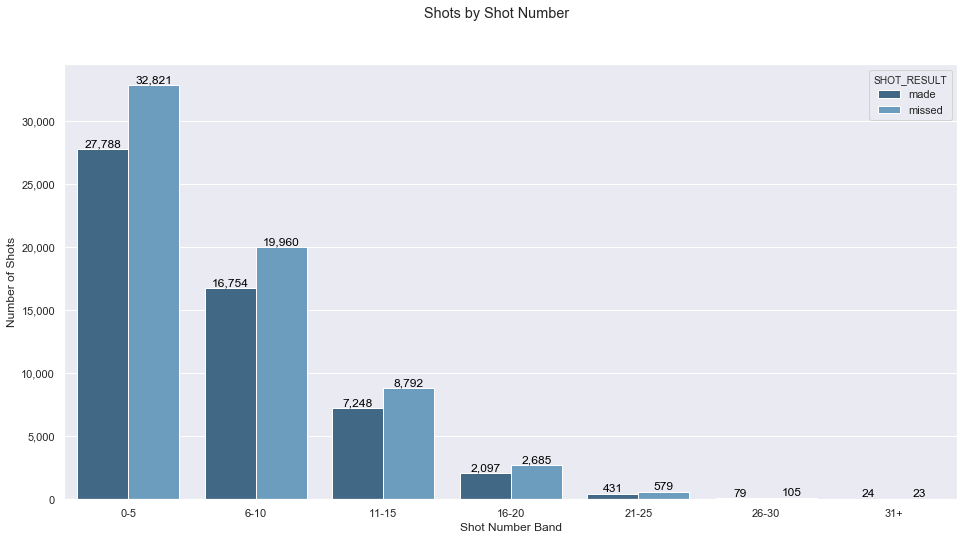

In [18]:
#A function to bundle the number of shots into bands
def add_shotband(value):
    
    ''' 
    A function that will bundle each shot in a band dependant on the number of shots.
    
    INPUT
    value: shot number
    
    OUTPUT
    band: band
    '''
        
    band = None
    
    if  value<6:
        band = '0-5'
    elif value<11:
        band = '6-10'
    elif value<16:
        band = '11-15'
    elif value<21:
        band = '16-20'
    elif value<26:
        band = '21-25'
    elif value<31:
        band = '26-30'
    else:
        band = '31+'

    return band

#Create the new column with the bands
shots_analysis['SHOT_NUMBER_BAND'] = shots_analysis.SHOT_NUMBER.apply(add_shotband)

#Plot all shots by shot number band
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='SHOT_NUMBER_BAND', hue='SHOT_RESULT', data = shots_analysis, order=['0-5','6-10','11-15','16-20'
                                                   ,'21-25','26-30','31+']
              ,palette='Blues_d')

# Iterate through the list of axes' patches to add the Data Labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), format(int(p.get_height()),','), 
            fontsize=12, color='black', ha='center', va='bottom')
    
#Format the y axis
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Add the plot headings and axis labels
plt.suptitle("Shots by Shot Number"); 
plt.xlabel('Shot Number Band');
plt.ylabel('Number of Shots');

#Calculate Percentage of Shots per each band
shots_bytype = shots_analysis.groupby(['SHOT_NUMBER_BAND','SHOT_RESULT'])['GAME_ID'].count()
shots_table = round(shots_bytype/shots_bytype.groupby(level=0).sum()*100,1)

#Print the table
print('Percentage of made and missed shots:')
print(shots_table)

Numbers are very similar accross different shot bands, suggesting that more shots being taken doesn't improve results.

### `8.`  Breakdown by Period(Quarter)

Percentage of made and missed shots:
PERIOD  SHOT_RESULT
1       made           46.5
        missed         53.5
2       made           45.5
        missed         54.5
3       made           46.1
        missed         53.9
4       made           44.2
        missed         55.8
5       made           39.4
        missed         60.6
6       made           44.9
        missed         55.1
7       made           40.0
        missed         60.0
Name: GAME_ID, dtype: float64


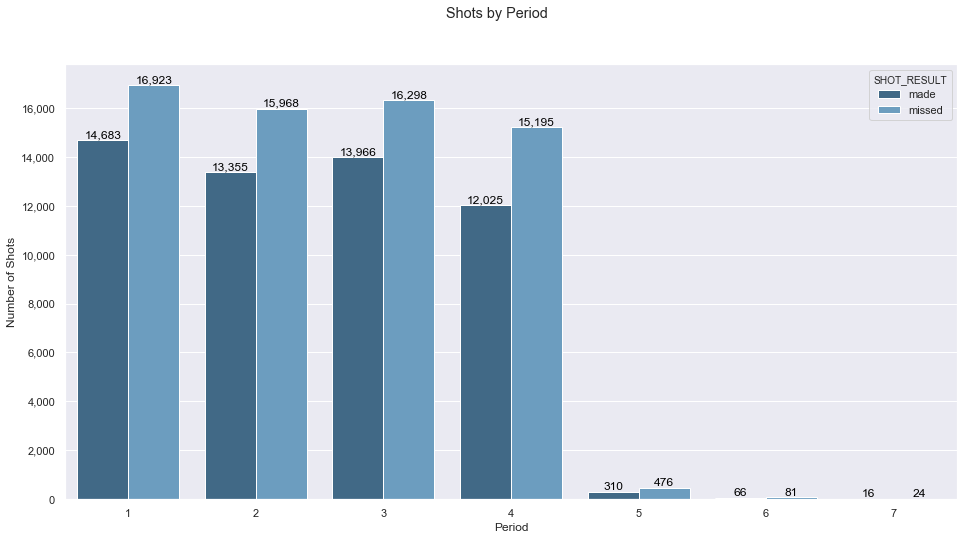

In [19]:
#Plot all shots by period
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='PERIOD', hue='SHOT_RESULT', data = shots_analysis,palette='Blues_d')

# Iterate through the list of axes' patches to add the Data Labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), format(int(p.get_height()),','), 
            fontsize=12, color='black', ha='center', va='bottom')
    
#Format the y axis
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Add the plot headings and axis labels
plt.suptitle("Shots by Period"); 
plt.xlabel('Period');
plt.ylabel('Number of Shots');

#Calculate Percentage of Shots per each period 
shots_bytype = shots_analysis.groupby(['PERIOD','SHOT_RESULT'])['GAME_ID'].count()
shots_table = round(shots_bytype/shots_bytype.groupby(level=0).sum()*100,1)

#Print the table
print('Percentage of made and missed shots:')
print(shots_table)

Numbers are similar across different quarters, however, we can see that there are more missed shots in the 4th Period and if the game went into overtime(more than 4 periods). Given the nature of the game, overtime is only 5 mins per period, hence time pressure as well as the stakes can potentially influence the shot-making ability.

A new variable will be created for the predictive modeling which will indicate if the shot is taken in the overtime or not.

### `9.`  Breakdown by Game Clock

Percentage of made and missed shots:
GAME_CLOCK_BAND  SHOT_RESULT
0-1              made           43.5
                 missed         56.5
1-2              made           46.7
                 missed         53.3
10-11            made           45.7
                 missed         54.3
11-12            made           43.7
                 missed         56.3
2-3              made           45.6
                 missed         54.4
3-4              made           45.7
                 missed         54.3
4-5              made           46.1
                 missed         53.9
5-6              made           46.0
                 missed         54.0
6-7              made           45.6
                 missed         54.4
7-8              made           45.8
                 missed         54.2
8-9              made           46.4
                 missed         53.6
9-10             made           45.5
                 missed         54.5
Name: GAME_ID, dtype: float64


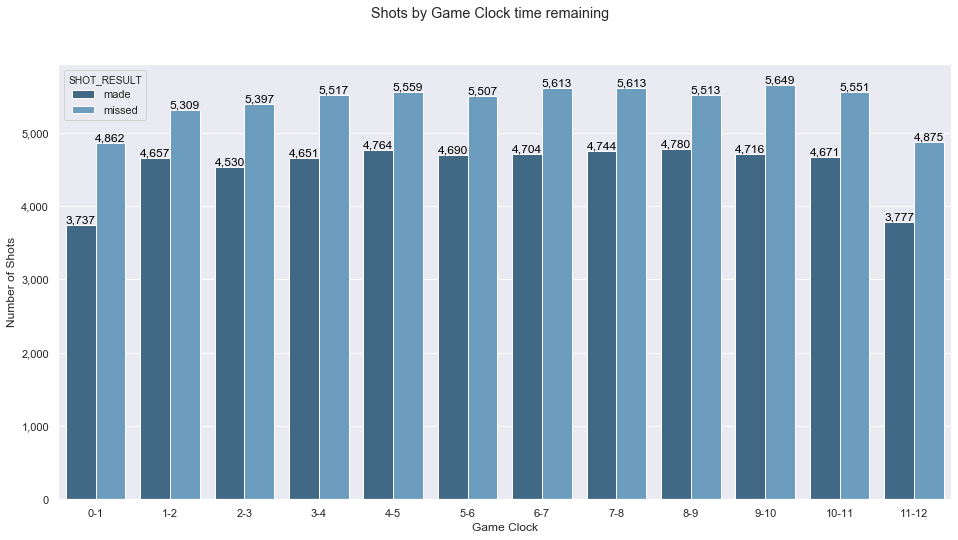

In [20]:
#A function to bundle the game clock into bands
def add_gameclockband(value):
    
    ''' 
    A function that will bundle each shot into a minute within the game clock.
    
    INPUT
    value: game clock
    
    OUTPUT
    band: band
    '''
        
    band = None
    
    if  value<datetime.time(0,1,0):
        band = '0-1'
    elif  value<datetime.time(0,2,0):
        band = '1-2'
    elif  value<datetime.time(0,3,0):
        band = '2-3'
    elif  value<datetime.time(0,4,0):
        band = '3-4'
    elif  value<datetime.time(0,5,0):
        band = '4-5'
    elif  value<datetime.time(0,6,0):
        band = '5-6'
    elif  value<datetime.time(0,7,0):
        band = '6-7'
    elif  value<datetime.time(0,8,0):
        band = '7-8'
    elif  value<datetime.time(0,9,0):
        band = '8-9'
    elif  value<datetime.time(0,10,0):
        band = '9-10'
    elif  value<datetime.time(0,11,0):
        band = '10-11'
    else:
        band = '11-12'

    return band

#Create the new column with the bands
shots_analysis['GAME_CLOCK_BAND'] = shots_analysis.GAME_CLOCK_NEW.apply(add_gameclockband) 

#Plot all shots by game clock
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='GAME_CLOCK_BAND', hue='SHOT_RESULT', data = shots_analysis, order=['0-1','1-2','2-3','3-4','4-5','5-6',
                                                                           '6-7','7-8','8-9','9-10','10-11','11-12']
              ,palette='Blues_d')

# Iterate through the list of axes' patches to add the Data Labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), format(int(p.get_height()),','), 
            fontsize=12, color='black', ha='center', va='bottom')
    
#Format the y axis
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Add the plot headings and axis labels
plt.suptitle("Shots by Game Clock time remaining"); 
plt.xlabel('Game Clock');
plt.ylabel('Number of Shots');

#Calculate Percentage of Shots per each band 
shots_bytype = shots_analysis.groupby(['GAME_CLOCK_BAND','SHOT_RESULT'])['GAME_ID'].count()
shots_table = round(shots_bytype/shots_bytype.groupby(level=0).sum()*100,1)

#Print the table
print('Percentage of made and missed shots:')
print(shots_table)

We can see that within 1 minute left on the game clock the proportion of missed shots is slightly higher. There could be two explanations for this:

1. Usually, a lot more is at stake by the end of the periods, especially late in the final quarter where misses could be driven by an increased intensity and pressure, bundled with a stronger defense from the opposing team.

2. Usually in games in quarters 1-3 there are sometimes long shots attempted in the final seconds when there is no time to organize an attack, which could lead to misses. 


### `10.`  Breakdown by Shot Clock

The shot clock in NBA is 24 Seconds.

Percentage of made and missed shots:
SHOT_CLOCK_BAND  SHOT_RESULT
0-1              made           27.7
                 missed         72.3
1-2              made           32.5
                 missed         67.5
10-11            made           44.6
                 missed         55.4
11-12            made           45.0
                 missed         55.0
12-13            made           45.1
                 missed         54.9
13-14            made           44.6
                 missed         55.4
14-15            made           44.7
                 missed         55.3
15-16            made           45.2
                 missed         54.8
16-17            made           45.8
                 missed         54.2
17-18            made           46.5
                 missed         53.5
18-19            made           48.0
                 missed         52.0
19-20            made           50.9
                 missed         49.1
2-3              made           36.7
         

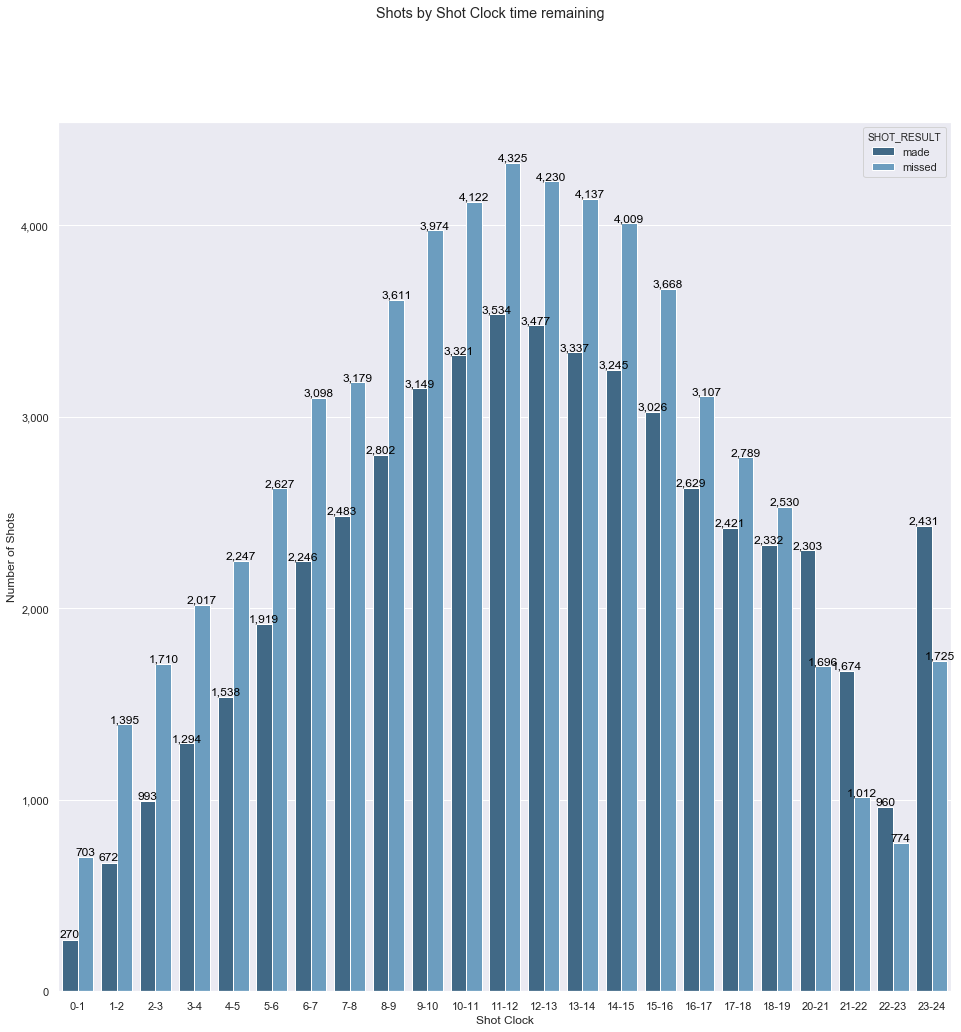

In [21]:
#A function to bundle the shot clock into bands
def add_shotclockband(value):
    
    ''' 
    A function that will bundle each shot into a second within the shot clock.
    
    INPUT
    value: shot clock
    
    OUTPUT
    band: band
    '''
        
    band = None
    
    if  value<1:
        band = '0-1'
    elif  value<2:
        band = '1-2'
    elif  value<3:
        band = '2-3'
    elif  value<4:
        band = '3-4'
    elif  value<5:
        band = '4-5'
    elif  value<6:
        band = '5-6'
    elif  value<7:
        band = '6-7'
    elif  value<8:
        band = '7-8'
    elif  value<9:
        band = '8-9'
    elif  value<10:
        band = '9-10'
    elif  value<11:
        band = '10-11'
    elif  value<12:
        band = '11-12'
    elif  value<13:
        band = '12-13'
    elif  value<14:
        band = '13-14'
    elif  value<15:
        band = '14-15'
    elif  value<16:
        band = '15-16'
    elif  value<17:
        band = '16-17'
    elif  value<18:
        band = '17-18'
    elif  value<19:
        band = '18-19'
    elif  value<20:
        band = '19-20'
    elif  value<21:
        band = '20-21'
    elif  value<22:
        band = '21-22'
    elif  value<23:
        band = '22-23'
    else:
        band = '23-24'

    return band

#Create the new column with the bands
shots_analysis['SHOT_CLOCK_BAND'] = shots_analysis.SHOT_CLOCK.apply(add_shotclockband)

#Plot all shots by shot clock
fig, ax = plt.subplots(figsize=(16,16))
sns.countplot(x='SHOT_CLOCK_BAND', hue='SHOT_RESULT', data = shots_analysis, order=['0-1','1-2','2-3','3-4','4-5','5-6',
                                                                           '6-7','7-8','8-9','9-10','10-11','11-12'
                                                                          ,'12-13','13-14','14-15','15-16','16-17'
                                                                          ,'17-18','18-19','20-21','21-22','22-23'
                                                                          ,'23-24']
              ,palette='Blues_d')

# Iterate through the list of axes' patches to add the Data Labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), format(int(p.get_height()),','), 
            fontsize=12, color='black', ha='center', va='bottom')
    
#Format the y axis
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Add the plot headings and axis labels
plt.suptitle("Shots by Shot Clock time remaining"); 
plt.xlabel('Shot Clock');
plt.ylabel('Number of Shots');

#Calculate Percentage of Shots per each band 
shots_bytype = shots_analysis.groupby(['SHOT_CLOCK_BAND','SHOT_RESULT'])['GAME_ID'].count()
shots_table = round(shots_bytype/shots_bytype.groupby(level=0).sum()*100,1)

#Print the table
print('Percentage of made and missed shots:')
print(shots_table)

We can see from the graph that in general the more time left from the shot clock the more points have been made. That potentially can be influenced by turnovers/steals that result in quick baskets. On the other side, the less time is left the larger the proportion of missed shots.

### `11.`  Breakdown by Dribbles

Percentage of made and missed shots:
DRIBBLES_BAND  SHOT_RESULT
0              made           47.6
               missed         52.4
1-4            made           44.2
               missed         55.8
10-14          made           43.1
               missed         56.9
15-19          made           41.2
               missed         58.8
20+            made           37.9
               missed         62.1
5-9            made           42.5
               missed         57.5
Name: GAME_ID, dtype: float64


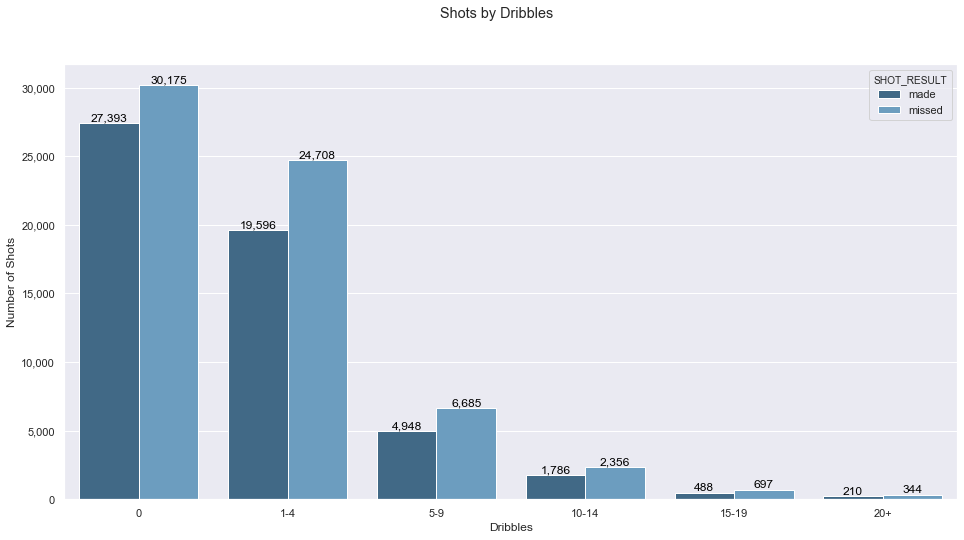

In [22]:
#A function to bundle the dribbles into bands
def add_dribblesband(value):
    
    ''' 
    A function that will bundle each shots into bands depending on the dribble
    
    INPUT
    value: dribbles
    
    OUTPUT
    band: band
    '''
        
    band = None
    
    if  value <1:
        band = '0'
    elif value <5 :
        band = '1-4'
    elif value <10:
        band = '5-9'
    elif value <15 :
        band = '10-14'
    elif value <20 :
        band = '15-19'
    else:
        band = '20+'

    return band

#Create the new column with the bands
shots_analysis['DRIBBLES_BAND'] = shots_analysis.DRIBBLES.apply(add_dribblesband)

#Plot all shots by dribbles
fig, ax = plt.subplots(figsize= (16,8))
sns.countplot(x='DRIBBLES_BAND', hue='SHOT_RESULT', data = shots_analysis,order=['0','1-4','5-9','10-14','15-19','20+'],
              palette='Blues_d')

# Iterate through the list of axes' patches to add the Data Labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), format(int(p.get_height()),','), 
            fontsize=12, color='black', ha='center', va='bottom')
    
#Format the y axis
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Add the plot headings and axis labels
plt.suptitle("Shots by Dribbles"); 
plt.xlabel('Dribbles');
plt.ylabel('Number of Shots');

#Calculate Percentage of Shots per each band 
shots_bytype = shots_analysis.groupby(['DRIBBLES_BAND','SHOT_RESULT'])['GAME_ID'].count()
shots_table = round(shots_bytype/shots_bytype.groupby(level=0).sum()*100,1)

#Print the table
print('Percentage of made and missed shots:')
print(shots_table)

There isn't much difference in terms of shots made and received given the number of dribbles made before making the shot. A slight spike is seen when we look at 20+ dribbles.

### `12.`  Breakdown by Touch Time

Percentage of made and missed shots:
TOUCH_TIME_BAND  SHOT_RESULT
0-1              made           49.6
                 missed         50.4
1-2              made           46.2
                 missed         53.8
10-11            made           40.7
                 missed         59.3
11-12            made           43.5
                 missed         56.5
12-13            made           43.5
                 missed         56.5
13-14            made           41.6
                 missed         58.4
14-15            made           41.3
                 missed         58.7
15-16            made           42.5
                 missed         57.5
16-17            made           37.3
                 missed         62.7
17-18            made           33.0
                 missed         67.0
18-19            made           38.5
                 missed         61.5
19-20            made           46.4
                 missed         53.6
2-3              made           42.9
         

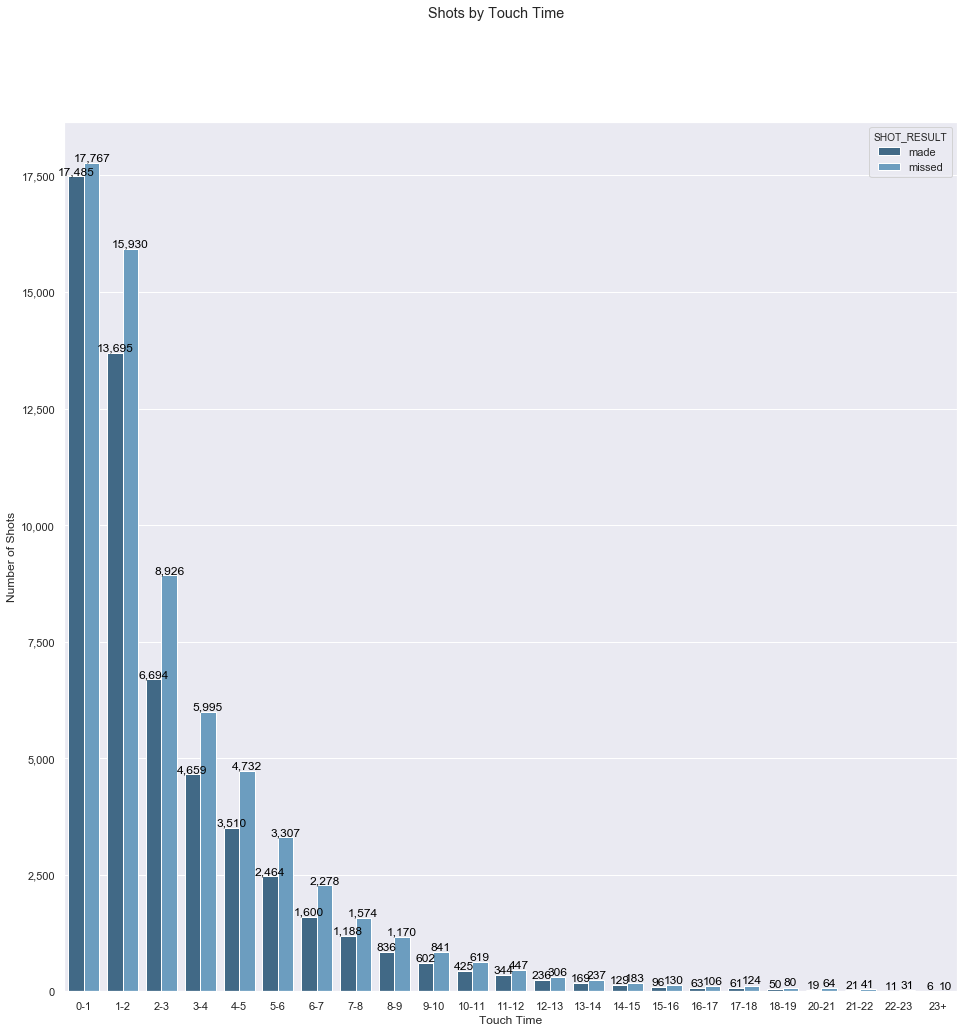

In [23]:
#A function to bundle the touch time into bands
def add_touchband(value):
    
    ''' 
    A function that will bundle each shot into a band dependent on the touch time.
    
    INPUT
    value: touch_time
    
    OUTPUT
    band: band
    '''
        
    band = None
    
    if  value<1:
        band = '0-1'
    elif  value<2:
        band = '1-2'
    elif  value<3:
        band = '2-3'
    elif  value<4:
        band = '3-4'
    elif  value<5:
        band = '4-5'
    elif  value<6:
        band = '5-6'
    elif  value<7:
        band = '6-7'
    elif  value<8:
        band = '7-8'
    elif  value<9:
        band = '8-9'
    elif  value<10:
        band = '9-10'
    elif  value<11:
        band = '10-11'
    elif  value<12:
        band = '11-12'
    elif  value<13:
        band = '12-13'
    elif  value<14:
        band = '13-14'
    elif  value<15:
        band = '14-15'
    elif  value<16:
        band = '15-16'
    elif  value<17:
        band = '16-17'
    elif  value<18:
        band = '17-18'
    elif  value<19:
        band = '18-19'
    elif  value<20:
        band = '19-20'
    elif  value<21:
        band = '20-21'
    elif  value<22:
        band = '21-22'
    elif  value<23:
        band = '22-23'
    else:
        band = '23+'

    return band

#Create the new column with the bands
shots_analysis['TOUCH_TIME_BAND'] = shots_analysis.TOUCH_TIME.apply(add_touchband)

#Plot all shots by touch time
fig, ax = plt.subplots(figsize=(16,16))
sns.countplot(x='TOUCH_TIME_BAND', hue='SHOT_RESULT', data = shots_analysis, order=['0-1','1-2','2-3','3-4','4-5','5-6',
                                                                           '6-7','7-8','8-9','9-10','10-11','11-12'
                                                                          ,'12-13','13-14','14-15','15-16','16-17'
                                                                          ,'17-18','18-19','20-21','21-22','22-23'
                                                                          ,'23+']
              ,palette='Blues_d')

# Iterate through the list of axes' patches to add the Data Labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), format(int(p.get_height()),','), 
            fontsize=12, color='black', ha='center', va='bottom')
    
#Format the y axis
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Add the plot headings and axis labels
plt.suptitle("Shots by Touch Time"); 
plt.xlabel('Touch Time');
plt.ylabel('Number of Shots');

#Calculate Percentage of Shots per each band
shots_bytype = shots_analysis.groupby(['TOUCH_TIME_BAND','SHOT_RESULT'])['GAME_ID'].count()
shots_table = round(shots_bytype/shots_bytype.groupby(level=0).sum()*100,1)

#Print the table
print('Percentage of made and missed shots:')
print(shots_table)

We see that generally, the proportion of missed shots is higher the longer the touch time is. However, it must be noted that the number of shots with long touch time is significantly smaller.

### `13.`  Breakdown by Distance

Note: The dataset doesn't come with a description for the distance metric used, i.e. whether it is Feet or Meters.

Percentage of made and missed shots:
SHOT_DIST_BAND  SHOT_RESULT
0               made           66.1
                missed         33.9
1-4             made           62.4
                missed         37.6
10-14           made           41.2
                missed         58.8
15-19           made           41.3
                missed         58.7
20-24           made           37.7
                missed         62.3
25-29           made           33.2
                missed         66.8
30-34           made           14.6
                missed         85.4
35+             made           22.7
                missed         77.3
5-9             made           43.8
                missed         56.2
Name: GAME_ID, dtype: float64


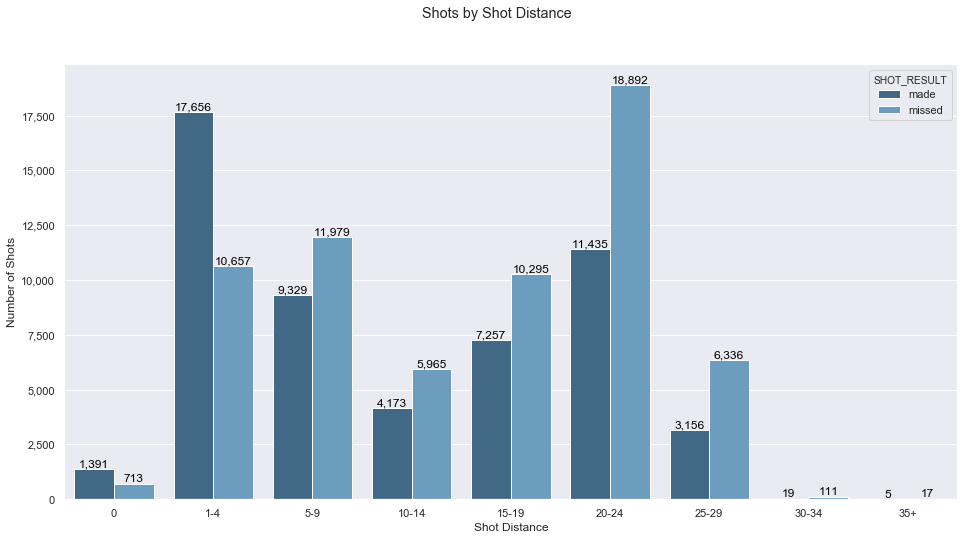

In [24]:
#A function to bundle the distance into bands
def add_shotdistanceband(value):
    
    ''' 
    A function that will bundle each shot into a bad dependant on the distance.
    
    INPUT
    value: shot_distance
    
    OUTPUT
    band: band
    '''
        
    band = None
    
    if  value <1:
        band = '0'
    elif value <5 :
        band = '1-4'
    elif value <10:
        band = '5-9'
    elif value <15 :
        band = '10-14'
    elif value <20 :
        band = '15-19'
    elif value <25 :
        band = '20-24'
    elif value <30 :
        band = '25-29'
    elif value <35 :
        band = '30-34'
    else:
        band = '35+'

    return band

#Create the new column with the bands
shots_analysis['SHOT_DIST_BAND'] = shots_analysis.SHOT_DIST.apply(add_shotdistanceband)

#Plot all shots by shot distance
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='SHOT_DIST_BAND', hue='SHOT_RESULT', data = shots_analysis,order=['0','1-4','5-9','10-14','15-19','20-24'
                                                                       ,'25-29','30-34','35+'],
              palette='Blues_d')

# Iterate through the list of axes' patches to add the Data Labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), format(int(p.get_height()),','), 
            fontsize=12, color='black', ha='center', va='bottom')
    
#Format the y axis
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Add the plot headings and axis labels
plt.suptitle("Shots by Shot Distance"); 
plt.xlabel('Shot Distance');
plt.ylabel('Number of Shots');

#Calculate Percentage of Shots per each band 
shots_bytype = shots_analysis.groupby(['SHOT_DIST_BAND','SHOT_RESULT'])['GAME_ID'].count()
shots_table = round(shots_bytype/shots_bytype.groupby(level=0).sum()*100,1)

#Print the table
print('Percentage of made and missed shots:')
print(shots_table)

We see a large difference that distance makes to the proportion of shotes made vs missed as with higher distance the more shots are missed.

However, upon exploration of the data it was noticed that a there is an overlap between the 2 and 3 point shots based on distance(refer to the plot below). In NBA the closest possible 3 point shot is 22 feet from the basket. Given that;
1. The dataset doesn't specify whether the distance is in feet or meters
2. We cannot be sure whether the distance is wrong or the classification of the shot is wrong
A firm decision cannot be made on whether to exclude overlaps or not, hence the models will be caveated for this and the model will include a version with and without distance.


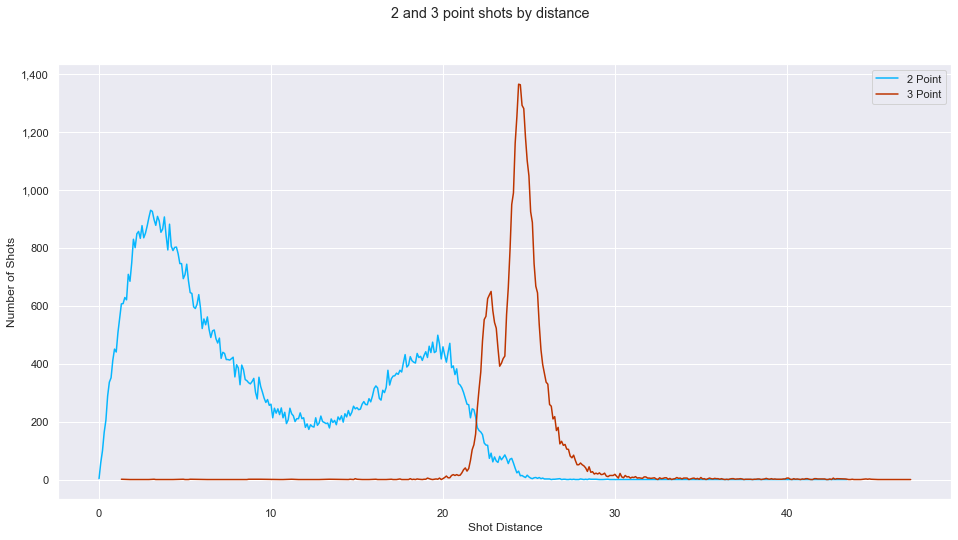

In [25]:
#Create a dataset with only 2 point shots
shots_2point = shots[shots['PTS_TYPE'] == 2].groupby(['SHOT_DIST'])['GAME_ID'].count()

#Create a dataset with only 3 point shots
shots_3point = shots[shots['PTS_TYPE'] == 3].groupby(['SHOT_DIST'])['GAME_ID'].count()

#Plot the two datasets on the same graph
fig, ax = plt.subplots(figsize=(16,8))
ax.plot( shots_2point, label="2 Point", color='#06b6fe')
ax.plot( shots_3point, label="3 Point", color='#bd3400')

#Format the y axis
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Add the plot headings and axis labels
plt.suptitle("2 and 3 point shots by distance"); 
plt.xlabel('Shot Distance');
plt.ylabel('Number of Shots');

#Show legends
plt.legend()
plt.show()

### `14.`  Breakdown by Closest Defender Distance

Percentage of made and missed shots:
CLOSE_DEF_DIST_BAND  SHOT_RESULT
0                    made           46.0
                     missed         54.0
1-4                  made           46.0
                     missed         54.0
10-14                made           46.6
                     missed         53.4
15-19                made           51.1
                     missed         48.9
20+                  made           74.0
                     missed         26.0
5-9                  made           44.0
                     missed         56.0
Name: GAME_ID, dtype: float64


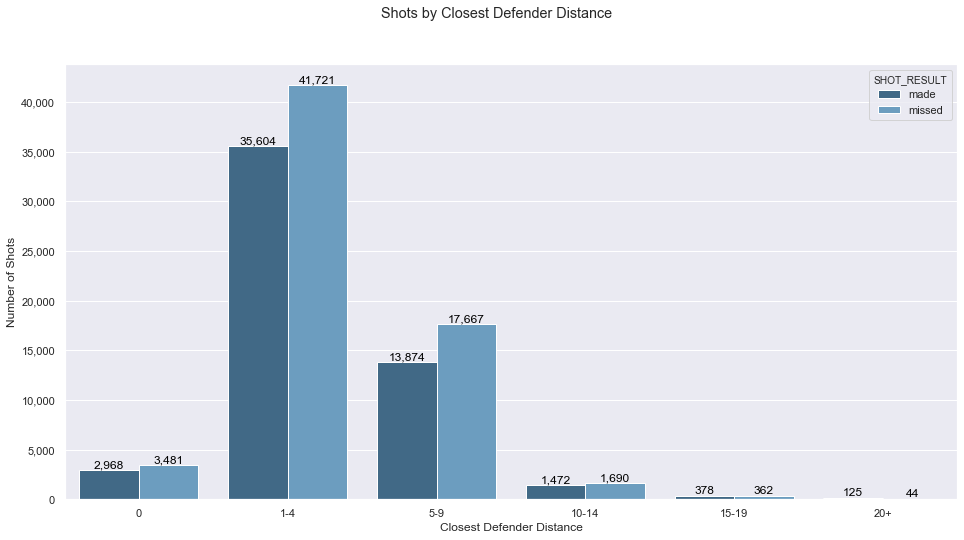

In [26]:
#A function to bundle the closest defender distance into bands
def add_shotdistanceband(value):
    
    ''' 
    A function that will bundle each shot into a band dependent on the closest defender
    
    INPUT
    value: closest defender distance
    
    OUTPUT
    band: band
    '''
        
    band = None
    
    if  value <1:
        band = '0'
    elif value <5 :
        band = '1-4'
    elif value <10:
        band = '5-9'
    elif value <15 :
        band = '10-14'
    elif value <20 :
        band = '15-19'
    else:
        band = '20+'

    return band

#Create the new column with the bands
shots_analysis['CLOSE_DEF_DIST_BAND'] = shots_analysis.CLOSE_DEF_DIST.apply(add_shotdistanceband)

#Plot all shots by closest defender distance
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(x='CLOSE_DEF_DIST_BAND', hue='SHOT_RESULT', data = shots_analysis,order=['0','1-4','5-9','10-14','15-19','20+'],
              palette='Blues_d')

# Iterate through the list of axes' patches to add the Data Labels
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), format(int(p.get_height()),','), 
            fontsize=12, color='black', ha='center', va='bottom')
    
#Format the y axis
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#Add the plot headings and axis labels
plt.suptitle("Shots by Closest Defender Distance"); 
plt.xlabel('Closest Defender Distance');
plt.ylabel('Number of Shots');

#Calculate Percentage of Shots per each band 
shots_bytype = shots_analysis.groupby(['CLOSE_DEF_DIST_BAND','SHOT_RESULT'])['GAME_ID'].count()
shots_table = round(shots_bytype/shots_bytype.groupby(level=0).sum()*100,1)

#Print the table
print('Percentage of made and missed shots:')
print(shots_table)

The data shows that defensive pressure does play a part in whether a shot would be made or not. The largest difference between the proportion of made vs missed shots is when there is 20+ distance.

## Section 3: Feature Engineering ##

As we saw in the analysis above not all features will be suitable to use given some of the limitations this might impose:
1. Whether the game is won or lost is only known after the game, hence the variable might not be appropriate to use. This variable will be excluded.
2. What the final margin is, is again only known after the game, hence the variable might not be appropriate to use. This variable will be excluded.
3. We only know the player's name/id who took the shot and the name of the closest defender, however, we do not have data that can help us measure their shot-making/defending ability respectively. Player names/ids will be excluded.

The final list of features to be:

Categorical:
- LOCATION:

Numerical:
- SHOT_NUMBER
- PERIOD
- SHOT_CLOCK
- DRIBBLES
- TOUCH_TIME
- SHOT_DIST
- PTS_TYPE
- CLOSE_DEF_DIS

Created from the dataset:
- GAME_CLOCK_SECONDS
- OVERTIME_FLAG: To indicate if the shot is taken in the overtime

In [27]:
#Copy the cleaned data set 
shots_ml = shots_cleaned.copy()

### `1.` Create overtime flag

In [28]:
shots_ml['OVERTIME_FLAG'] = shots_ml.PERIOD.apply(lambda x: 1 if x<5 else 0)

### `2.` Encode the SHOTS_MADE column

made = 1
missed = 0

In [29]:
#A function to split the shot into regular or overtime
shots_ml['SHOTS_MISSED_ENC'] = shots_ml.SHOT_RESULT.apply(lambda x: 1 if x == 'made' else 0)

In [30]:
#Drop the unnecessary columns:
shots_ml = shots_ml.drop(['FINAL_MARGIN','GAME_ID','MATCHUP','W','GAME_CLOCK','SHOT_RESULT','CLOSEST_DEFENDER'
                          ,'CLOSEST_DEFENDER_PLAYER_ID','player_name','player_id','GAME_CLOCK_NEW','FGM','PTS'],axis = 1)
shots_ml.head()

,LOCATION,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,GAME_CLOCK_SECONDS,OVERTIME_FLAG,SHOTS_MISSED_ENC
0,A,1,1,10.8,2,1.9,7.7,2,1.3,69,1,1
1,A,2,1,3.4,0,0.8,28.2,3,6.1,14,1,0
3,A,4,2,10.3,2,1.9,17.2,2,3.4,707,1,0
4,A,5,2,10.9,2,2.7,3.7,2,1.1,634,1,0
5,A,6,2,9.1,2,4.4,18.4,2,2.6,495,1,0


### `3.` Encode the LOCATION column using one hot encoding

In [31]:
shots_ml = pd.get_dummies(shots_ml, columns = ['LOCATION'],drop_first = True)
shots_ml.head()

,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSE_DEF_DIST,GAME_CLOCK_SECONDS,OVERTIME_FLAG,SHOTS_MISSED_ENC,LOCATION_H
0,1,1,10.8,2,1.9,7.7,2,1.3,69,1,1,0
1,2,1,3.4,0,0.8,28.2,3,6.1,14,1,0,0
3,4,2,10.3,2,1.9,17.2,2,3.4,707,1,0,0
4,5,2,10.9,2,2.7,3.7,2,1.1,634,1,0,0
5,6,2,9.1,2,4.4,18.4,2,2.6,495,1,0,0


In [32]:
# Get a list of all features
features = list(shots_ml.drop(['SHOTS_MISSED_ENC'],axis = 1).columns)
print(features)

['SHOT_NUMBER', 'PERIOD', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'CLOSE_DEF_DIST', 'GAME_CLOCK_SECONDS', 'OVERTIME_FLAG', 'LOCATION_H']


## Section 5: Modelling

In this section I will build, test and optimize the models.

The main metric that we will be looking at is F1 score, given that it takes into consideration precision and recall in combination. We need both of them given that we would want to retrieve as many made shots as possible. The cost of a high number of good shots that were not classified can potentially be high given that there is a time constraint on the play and an opportunity for a good shot might not come again resulting in the opposing team having an opportunity to attack.


### Section 5.1 Run on the full data


Split the train and test data

In [33]:
# Create X and y variables
X = shots_ml[features]
y = shots_ml.SHOTS_MISSED_ENC

#Split between test and train data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### `1.`  Logistic Regression

In [34]:
#Instantiate the model
logreg = LogisticRegression(max_iter=1000)

#Fit the model
logreg.fit(X_train,y_train)

#Get a list of the predicted variables
y_pred = logreg.predict(X_test)

#Calculate and print metrics
cnf_matrix = confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

[[13960  5513]
 [ 8641  7702]]
Accuracy:  0.6048134911771276
Precision:  0.5828225501324252
Recall:  0.47127210426482286
MSE:  0.3951865088228725
F1 Score:  0.5211448677177076


The starting model has and MSE of 0.40 and F1 Score of 0.52, which does not represent a great accuracy.

#### `2.`  Random Forest Classifier

In [35]:
#Instantiate the model
rf = RandomForestClassifier()

#Fit the model
rf.fit(X_train,y_train)

#Get a list of the predicted variables
y_pred = rf.predict(X_test)

#Calculate and print metrics
cnf_matrix = confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

[[14933  4540]
 [ 9762  6581]]
Accuracy:  0.6006812597721689
Precision:  0.5917633306357342
Recall:  0.40268004650309003
MSE:  0.39931874022783115
F1 Score:  0.47924555782114775


The Random Forest Classifier has the same MSE as the Logistic Regression, but lower F1 Score.

#### `3.`  XGBoost

In [36]:
#Instantiate the model
xgb = XGBClassifier()

p#Fit the model
xgb.fit(X_train,y_train)

#Get a list of the predicted variables
y_pred = xgb.predict(X_test)

#Calculate and print metrics
cnf_matrix = confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

[[15801  3672]
 [10333  6010]]
Accuracy:  0.6089736430645522
Precision:  0.6207395166287957
Recall:  0.3677415407207979
MSE:  0.39102635693544785
F1 Score:  0.4618635926993276


The XGBoost has a lower F1 Score compared to the otehr two models, however the Accuracy and Precision are higher. What is brining the score down is the much smaller recall, especially compared to the Logistic Regression.

### Section 5.2 Remove Shot Distance

In [207]:
# Get a list of all features
features_exdist = list(shots_ml.drop(['SHOTS_MISSED_ENC','SHOT_DIST'],axis = 1).columns)
print(features_exdist)

['SHOT_NUMBER', 'PERIOD', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'PTS_TYPE', 'CLOSE_DEF_DIST', 'GAME_CLOCK_SECONDS', 'OVERTIME_FLAG', 'LOCATION_H']


In [208]:
# Create X and y variables
X = shots_ml[features_exdist]
y = shots_ml.SHOTS_MISSED_ENC

#Split between test and train data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 0)


#### `1.`  Logistic Regression

In [209]:
#Instantiate the model
logreg = LogisticRegression(max_iter=1000)

#Fit the model
logreg.fit(X_train,y_train)

#Get a list of the predicted variables
y_pred = logreg.predict(X_test)

#Calculate and print metrics
cnf_matrix = confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

[[14125  5348]
 [ 9880  6463]]
Accuracy:  0.5748268930087111
Precision:  0.5472017610701888
Recall:  0.3954598298965918
MSE:  0.4251731069912888
F1 Score:  0.459117709739291


Dropping the Shot Distance doesn't improve the Logistic Regression with F1 score decreasing substantially. Given the lower scores this variable will be kept, however to improve the accuracy the data quality must be checked.

#### `2.`  Random Forest Classifier

In [210]:
#Instantiate the model
rf = RandomForestClassifier()

#Fit the model
rf.fit(X_train,y_train)

#Get a list of the predicted variables
y_pred = rf.predict(X_test)

#Calculate and print metrics
cnf_matrix = confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

[[13868  5605]
 [ 9813  6530]]
Accuracy:  0.5695220013401832
Precision:  0.53811289658014
Recall:  0.39955944441045094
MSE:  0.43047799865981684
F1 Score:  0.45859962075988486


Removing the shot ditance increases the MSE, but decreases the F1 score. Similar to the conculsion for the Logistic Regression the feature will be kept.

#### `3.`  XGBoost

In [211]:
#Instantiate the model
xgb = XGBClassifier()

#Fit the model
xgb.fit(X_train,y_train)

#Get a list of the predicted variables
y_pred = xgb.predict(X_test)

#Calculate and print metrics
cnf_matrix = confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

[[14863  4610]
 [10375  5968]]
Accuracy:  0.5816115702479339
Precision:  0.5641898279447911
Recall:  0.36517163311509515
MSE:  0.41838842975206614
F1 Score:  0.44337134578953236


Similar to above the Accuracy, Precision and F1 drop compared to the model with the shot distance.

### Section 5.3 Undersampling the data to get the equal number of missed and made shots

First under sample the data to get to the same number

In [212]:
#Get the number of missed shots
no_made = len(shots_ml[shots_ml['SHOTS_MISSED_ENC']==1])

#Get the indices of the missed shots
total_indices_missed = shots_ml[shots_ml['SHOTS_MISSED_ENC']==0].index

#Get Random indices
random_indices_missed = np.random.choice(total_indices_missed,no_made,replace = False)

#Get the indices of the made shots
indices_made = shots_ml[shots_ml['SHOTS_MISSED_ENC']==1].index

#Concatenate the indices of both populations
undersample_indices = np.concatenate([indices_made,random_indices_missed])

#Get only the indices needed
shots_ml_undersample = shots_ml.loc[undersample_indices]

print(shots_ml_undersample.groupby('SHOTS_MISSED_ENC')['SHOT_NUMBER'].count())

SHOTS_MISSED_ENC
0    54421
1    54421
Name: SHOT_NUMBER, dtype: int64


In [213]:
# Create X and y variables
X = shots_ml_undersample[features]
y = shots_ml_undersample.SHOTS_MISSED_ENC

#Split between test and train data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### `1.`  Logistic Regression

In [214]:
#Instantiate the model
logreg = LogisticRegression(max_iter=1000)

#Fit the model
logreg.fit(X_train,y_train)

#Get a list of the predicted variables
y_pred = logreg.predict(X_test)

#Calculate and print metrics
cnf_matrix = confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

[[9806 6582]
 [6911 9354]]
Accuracy:  0.5867761002051879
Precision:  0.5869728915662651
Recall:  0.5750999077774362
MSE:  0.4132238997948121
F1 Score:  0.5809757460948418


Undersampling the data produces far better results, given the higher MSE and F1 scores.

#### `2.`  Random Forest Classifier

In [215]:
#Instantiate the model
rf = RandomForestClassifier()

#Fit the model
rf.fit(X_train,y_train)

#Get a list of the predicted variables
y_pred = rf.predict(X_test)

#Calculate and print metrics
cnf_matrix = confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

[[10658  5730]
 [ 8106  8159]]
Accuracy:  0.5762717055094478
Precision:  0.5874433004535964
Recall:  0.5016292652935752
MSE:  0.42372829449055216
F1 Score:  0.5411554022683558


Similar to the Logistic Regression undersampling the data improves the scores with the F1 score increasing. However the Logistic Regression still performs better.

#### `3.`  XGBoost

In [216]:
#Instantiate the model
xgb = XGBClassifier()

#Fit the model
xgb.fit(X_train,y_train)

#Get a list of the predicted variables
y_pred = xgb.predict(X_test)

#Calculate and print metrics
cnf_matrix = confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

[[11520  4868]
 [ 8618  7647]]
Accuracy:  0.5869904756071418
Precision:  0.6110267678785457
Recall:  0.47015063018751924
MSE:  0.41300952439285826
F1 Score:  0.531410701876303


Similar ot the other two models the F1 score icreases, given a major increase in the recall comapred to the first XGBoost model from 0.39 to 0.49.

### Section 5.4 Optimizing the hyperparameters

#### `1.`  Logistic Regression

First create the parameter grid

In [217]:
#Print the parameters currently in use
print(logreg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [218]:
#Create Parameter Grid
param_grid = [    
    {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.001,0.1,1,100],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000, 5000]
    }
]

Use GridSearchCV to find the best parameters by fitting the model to the train data. We would want to optimize the F1 score to be able to compare easily across the models.

In [219]:
#Instantiate the GridSearcCV
logreg_param = GridSearchCV(logreg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1,scoring = 'f1')

#Fit the model to the train data
logreg_optimized = logreg_param.fit(X_train,y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 24.5min finished


In [220]:
# Show the best combination
logreg_optimized.best_estimator_

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

The GridSearch found the following parameters to fit best:
- penalty = l1
- C = 0.001
- solver = saga
- max_iter = 5000

Test the new model using the test data and print score.

In [221]:
#Get a list of the predicted variables
y_pred = logreg_optimized.predict(X_test)

#Calculate and print metrics
cnf_matrix = confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

[[9622 6766]
 [6787 9478]]
Accuracy:  0.5849385967598689
Precision:  0.5834769761142575
Recall:  0.5827236397171841
MSE:  0.4150614032401311
F1 Score:  0.583100064597496


There is a minimal improvement in the F1 score with some increase in the True Negatives and a decrease in the True Positives.

#### `2.`  Random Forest Classifier

First create the parameter grid

In [222]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [225]:
#Create Parameter Grid
param_grid = [    
    {
    'bootstrap': [True, False],
    'max_depth': [10, 50, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
    }
]

In [226]:
#Instantiate the GridSearcCV
rf_param = GridSearchCV(rf, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1,scoring = 'f1')

#Fit the model to the train data
rf_optimized = rf_param.fit(X_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 34.9min finished


In [228]:
rf_optimized.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

The GridSearch found the following parameters to fit best:
- bootstrap = False
- max_depth = None
- max_features = 'sqrt'
- min_samples_leaf = 2
- min_samples_split = 5

In [229]:
#Get a list of the predicted variables
y_pred = rf_optimized.predict(X_test)

#Calculate and print metrics
cnf_matrix = confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

[[10380  6008]
 [ 7821  8444]]
Accuracy:  0.5764860809114017
Precision:  0.5842789925269859
Recall:  0.5191515524131571
MSE:  0.4235139190885983
F1 Score:  0.5497932740827555


Again there is a very marginal improvement in the metrics

#### `3.`  XGBoost

First create the parameter grid

In [230]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [231]:
param_grid = [
        {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
]

In [232]:
#Instantiate the GridSearcCV
xgb_param = GridSearchCV(xgb, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1,scoring = 'f1')

#Fit the model to the train data
xgb_optimized = xgb_param.fit(X_train,y_train)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 14.0min finished


In [233]:
xgb_optimized.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

The GridSearch found the following parameters to fit best:
- min_child_weight = 5
- gamma = 1
- subsample = 0.6
- max_depth = 5

In [234]:
#Get a list of the predicted variables
y_pred = xgb_optimized.predict(X_test)

#Calculate and print metrics
cnf_matrix = confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

[[11587  4801]
 [ 8591  7674]]
Accuracy:  0.5898692310048081
Precision:  0.6151503006012025
Recall:  0.47181063633569015
MSE:  0.41013076899519185
F1 Score:  0.5340292275574113


Similar to the previous models we see a very small increase in the F1 Score.

### Section 5.5 Most Important Features Using Random Forest Feature Importances

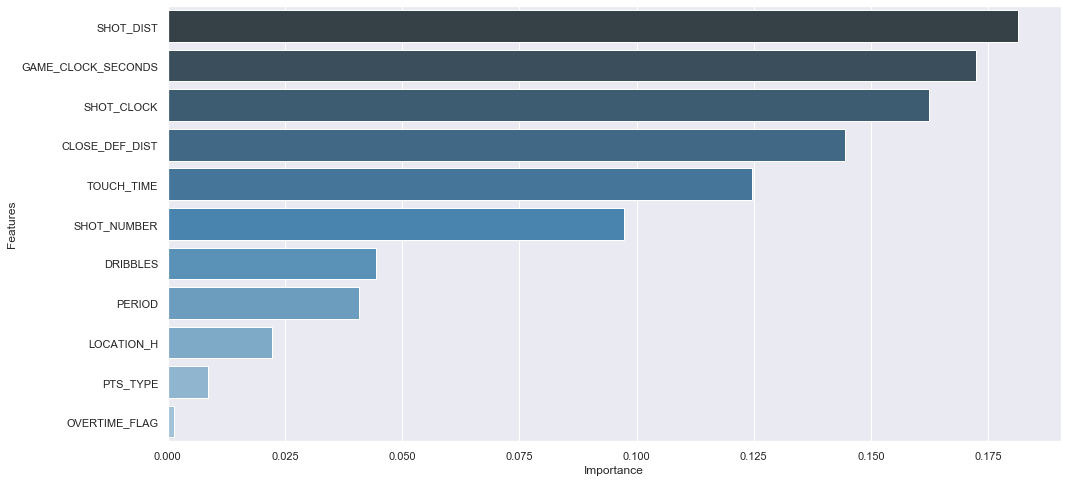

In [260]:
#Create a dataframe with the feature importance
importance = percentile_list = pd.DataFrame(
            {'Features': features,
             'Importance': list(rf.feature_importances_)
            })
#Sort Values
importance = importance.sort_values(by=['Importance'], ascending=False)
                                    
#Plot the features
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x='Importance', y ='Features',data = importance ,palette='Blues_d')

## Section 6: Conlusion



### Section 6.1: Project Reflection

Overall the project was found challenging mainly due to the structure of the data and the questions that remain around some data points. The dataset did not require much cleaning up, however, some caveats had to be stated while building the analysis and the model with the main one being the crossover between Shot Distance and Point Type. There are some shots that appear to be taken beyond the 3 point line and some 3 point shots that appear to be taken from the 2 point zone. 

In the beginning of this project I had stated two questions:

**1. What are the most important factors to consider for a shot to be successful?**

**2. Can  we use the general data provided behind each shot to predict if a shot is going to be made?**


#### Questions 1:

From the correlation analysis in the Exploratory Analysis section, we saw fairly mixed results across the variables. The majority of them exhibit low correlation with Shot Distance, Points Type, Shot Number, Dribbles, and Touch Time showcasing the strongest numbers(albeit still considered fairly low).

For simplicity I have used Random Forest's feature importance to see which features are the most important. Out of the 11 Shot Distance, Game Clock, Shot Clock and Closest Defender Distance seemed to be the most important ones.


#### Questions 2:

I decided to test 3 separate models to see whether a shot can be predicted with reasonable success: Logistic Regression, Random Forest Classifier, and XGBoost Classifier. The f1 score was chosen as the appropriate metric here the highest one being achieved by Logistic Regression - 0.58, with Random Forest at 0.55 and XGBoost at 0.53. The score is not particularly high, however, I see a lot of room for future improvement of the models


### Section 6.2: Future Improvement

There are 4 main opportunities for future improvement identified:

1. In the Feature Engineering section, I suggested gathering further data for Margin and Outcome at the point of the shot i.e. what is the point margin between the teams and what team is winning when the shot is made. Those could potentially be extremely useful fields as players can potentially feel pressured to take riskier and quicker shots if they are currently losing the game.

2. Additional data points around the effectiveness of the players in both offense and defense could potentially be extremely valuable as predictors. Statistics such as FG%, 2 Point %, and 3 Point % as a starting point could help us evaluate players effectiveness on the offensive end. Additionally, some states such as steals and blocks can help us evaluate the player's ability to defend. The analysis above excluded the player's effect and focused mainly on the technicalities behind the shot, however, the ability of the player could be a very important determining factor here.

3. Explore further parameters for the models. I have tried optimizing it with a few parameters, however, there is further opportunity to improve and experiment here.

3. Try different models to classify the shots. I have used the 3 most popular classifiers, however, with more data points we could expand the analysis further and try models such as Support Vector Machine or Neural Networks.
